Use the code provided in demo 02 to complete this assignment.

Step 1. Follow along with the tutorial to gain an understanding of the process

Step 2. In a new .ipynb notebook, reproduce the results utilizing the "QMNIST" dataset 

Step 3. Report on the results in terms of prediction accuracy on the train and test datasets

Step 4. Choose one of the proposed modifications below:

Add another Dense layer of 128 nodes
Increase the current number of nodes in the layer to 256
Hypothesize how it would change the performance results

Step 5. Modify the model based on the chosen method and train

Step 6. Report on the results of the modified model and if it matches your hypothesis

Step 7. Experiment with different optimizers, loss functions, dropout, and activation functions, and observe the change in performance as you tune these hyperparameters.

Step 8. Show an example of a backpropagation algorithm by hand (one round of forward step and backward step on a smaller network by performing derivatives by hand instead of using coding libraries, you can use the reference video:
https://www.youtube.com/watch?v=0e0z28wAWfg)

In [95]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
from torch.utils.data.dataset import random_split
import matplotlib.pyplot as plt
from qmnist import QMNIST
import random

In [96]:
# Load QMNIST dataset and preprocess
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
train_dataset = torchvision.datasets.QMNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.QMNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

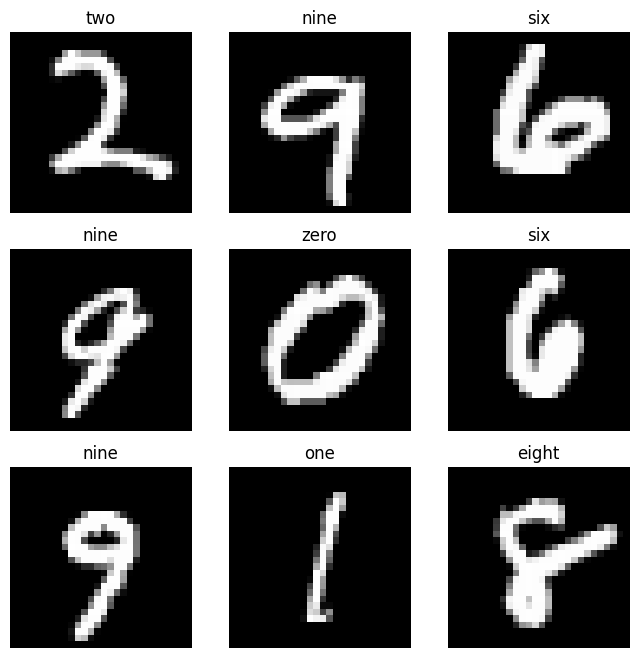

In [97]:
labels_map = {
    0: "zero",
    1: "one",
    2: "two",
    3: "three",
    4: "four",
    5: "five",
    6: "six",
    7: "seven",
    8: "eight",
    9: "nine",
}


#plot 9 train dataset samples

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
    #print(sample_idx)
    img, label = train_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

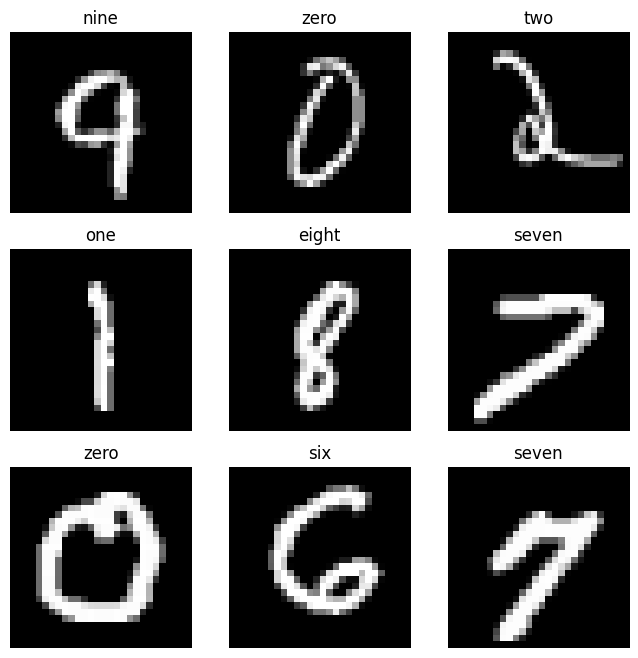

In [98]:
#plot 9 test dataset samples
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(test_dataset), size=(1,)).item()
    img, label = test_dataset[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Baseline MLP from demo

In [99]:
#Define the neural network architecture

"""
MLP with 4 fully-connected layers and ReLU activation functions
- designed to process input data with 28x28 dimensions (e.g., images)
- produce an output with 10 elements


"""
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(128, 128) #additional fully-connected layers with different input and output neuron counts
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.

    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = self.fc3(x)
        return x

# Initialize the neural network
model = MLP()

Neural network architecture design for an MLP (Multi-layer Perceptron)

In [100]:
# Define the loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train the neural network
num_epochs = 5
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        if i % 100 == 99:  # print every 100 mini-batches
            print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
            running_loss = 0.0

print('Finished Training')

Epoch 1, Batch 100, Loss: 1.3930880433321
Epoch 1, Batch 200, Loss: 0.49608584970235825
Epoch 1, Batch 300, Loss: 0.3713219277560711
Epoch 1, Batch 400, Loss: 0.3459455294907093
Epoch 1, Batch 500, Loss: 0.36178550735116005
Epoch 1, Batch 600, Loss: 0.33347351431846617
Epoch 1, Batch 700, Loss: 0.28789386339485645
Epoch 1, Batch 800, Loss: 0.2718502315878868
Epoch 1, Batch 900, Loss: 0.24149884037673475
Epoch 2, Batch 100, Loss: 0.22427051812410354
Epoch 2, Batch 200, Loss: 0.21782338105142116
Epoch 2, Batch 300, Loss: 0.21385173119604586
Epoch 2, Batch 400, Loss: 0.19377055771648885
Epoch 2, Batch 500, Loss: 0.20456778939813375
Epoch 2, Batch 600, Loss: 0.17389036579057573
Epoch 2, Batch 700, Loss: 0.17599293895065785
Epoch 2, Batch 800, Loss: 0.1729669888317585
Epoch 2, Batch 900, Loss: 0.19436381850391626
Epoch 3, Batch 100, Loss: 0.14771403117105364
Epoch 3, Batch 200, Loss: 0.1454916494898498
Epoch 3, Batch 300, Loss: 0.15986832967028022
Epoch 3, Batch 400, Loss: 0.136055129133164

In [101]:
# Evaluate the model
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy on test set: { round(correct / total * 100,5)}%')

Accuracy on test set: 96.21333%


In [102]:
# Evaluate the model and store predictions
model.eval()
predictions = []
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        predictions.extend(predicted.numpy())  # Store predictions
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

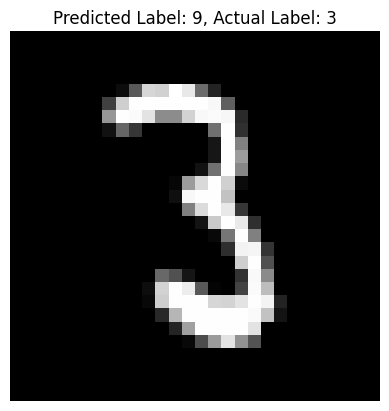

In [103]:
# Get one test image and its label
random_img = random.randint(1,32)
image, label = images[random_img], labels[random_img]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[random_img]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()

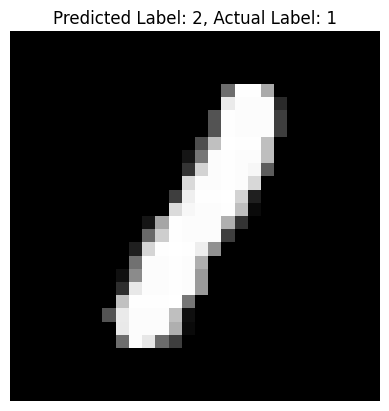

In [104]:
# Get one test image and its label
image, label = images[1], labels[1]

# Reshape the image tensor to a 28x28 shape
image = image.view(28, 28)

# Convert the image tensor to a numpy array for visualization
image_numpy = image.numpy()

# Show the image
plt.imshow(image_numpy, cmap='gray')
plt.title(f'Predicted Label: {predictions[1]}, Actual Label: {label.item()}')
plt.axis('off')
plt.show()


## Experimentation

Considerations for optimal model performance:
1. To reduce risk of overfitting:
    - control level of excess parameters, thought it is a safe option to considerably maximize number of hidden units and layers
    - apply early stop condition or regularization

As a baseline, the initial MLP model achieves a performance of about 96.70333% on the testing set.

By adding an additional dense layer of 128 nodes or increasing the number of nodes in the layer to 256, we augment the model's ability to learn and capture potentially complex patterns that may not have been identified during the baseline model traing iteration. Expanding training resouces, requiring longer training times and computing, could lead to improved performance and accuracies on testing data, with the risk of overfitting.

All following experimentations are performed with only 5 epochs for standardized evaluations and learning rate of 0.01

### adding an additional dense layer of 128 nodes

##### Code

In [105]:
"""
Place all methods into a single MLP class
"""

class MLP_add_dense_layer(nn.Module):
    def __init__(self):
        super(MLP_add_dense_layer, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(128, 128) #additional fully-connected layers with different input and output neuron counts
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = torch.relu(self.fc3(x))
        x = self.fc4(x)
        return x
    
    def train_model(self, train_loader, optimizer, criterion, num_epochs=5):
        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        for epoch in range(num_epochs):
            self.train()  # Set the model to training mode
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)  # Call forward method directly on self
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:  # print every 100 mini-batches
                    print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                    running_loss = 0.0

        print('Finished Training')
        
    def evaluate_model(self):
                # Evaluate the model and store predictions
        self.eval()
        predictions = []
        self.correct = 0
        self.total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())  # Store predictions
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()

        print(f'\n Accuracy on test set: { round(self.correct / self.total * 100,5)}%')
        
        #plot 9 test dataset samples
        figure = plt.figure(figsize=(8, 8))
        cols, rows = 3, 3
        for i in range(1, cols * rows + 1):
            #sample_idx = random.randint(1,31)
            sample_idx = torch.randint(len(images), size=(1,)).item()
            img, label = images[sample_idx], labels[sample_idx]
            figure.add_subplot(rows, cols, i)
            #plt.title(labels_map[label])
            plt.title(f'Predicted Label: {predictions[sample_idx]}, \n Actual Label: {label.item()}')
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
            plt.tight_layout()
        plt.show()

#### Results

Epoch 1, Batch 100, Loss: 1.462564773261547
Epoch 1, Batch 200, Loss: 0.5340637463331223
Epoch 1, Batch 300, Loss: 0.41029855713248253
Epoch 1, Batch 400, Loss: 0.35479327239096164
Epoch 1, Batch 500, Loss: 0.31824452221393584
Epoch 1, Batch 600, Loss: 0.2825944512337446
Epoch 1, Batch 700, Loss: 0.28035684004426004
Epoch 1, Batch 800, Loss: 0.2637873465567827
Epoch 1, Batch 900, Loss: 0.2582741207629442
Epoch 2, Batch 100, Loss: 0.23573317751288414
Epoch 2, Batch 200, Loss: 0.23141984403133392
Epoch 2, Batch 300, Loss: 0.21241175428032874
Epoch 2, Batch 400, Loss: 0.1800033636018634
Epoch 2, Batch 500, Loss: 0.18007537495344877
Epoch 2, Batch 600, Loss: 0.16930928252637387
Epoch 2, Batch 700, Loss: 0.17468758270144463
Epoch 2, Batch 800, Loss: 0.16071203568950296
Epoch 2, Batch 900, Loss: 0.15986462455242872
Epoch 3, Batch 100, Loss: 0.14251389626413583
Epoch 3, Batch 200, Loss: 0.147628938741982
Epoch 3, Batch 300, Loss: 0.14090579183772206
Epoch 3, Batch 400, Loss: 0.154368205880746

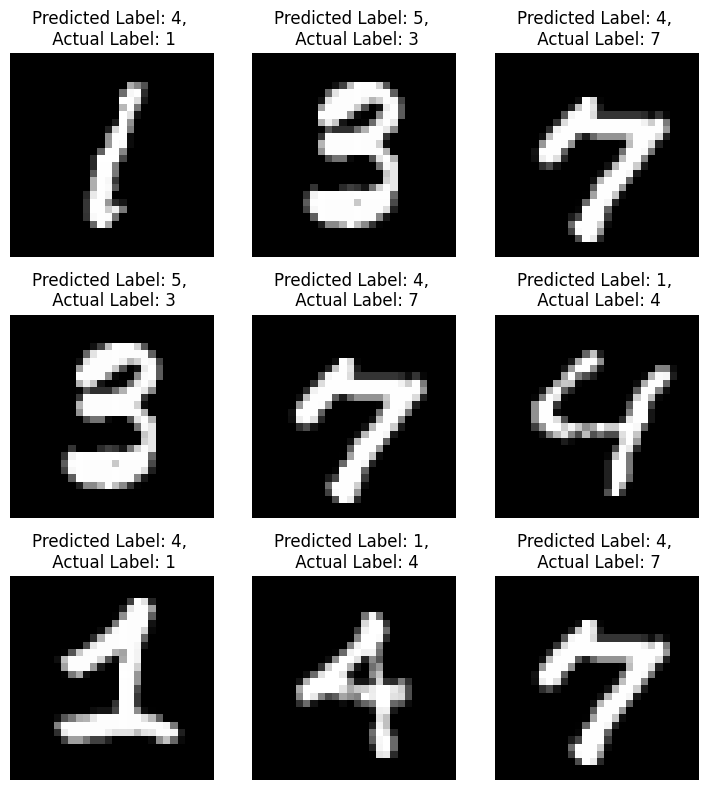

In [106]:
# Initialize the neural network
model = MLP_add_dense_layer()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()

Slight decrease in performance relative to baseline from 96.70333% to 96.51333%.

### add a dropout layer

#### Code

In [107]:
"""
Place all methods into a single MLP class

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
- add a dropout layer with p=0.5 as a technqiue for regularization
"""

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(128, 128) #additional fully-connected layers with different input and output neuron counts
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.
        self.dropout = nn.Dropout(0.25) ## ADD DROPOUT FOR REGULARIZATION
        self.dropout2 = nn.Dropout2d(0.5)
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = self.fc3(x)
        return x
    
    def train_model(self, train_loader, optimizer, criterion, num_epochs=5):
        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        for epoch in range(num_epochs):
            self.train()  # Set the model to training mode
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)  # Call forward method directly on self
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:  # print every 100 mini-batches
                    print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                    running_loss = 0.0

        print('Finished Training')
        
    def evaluate_model(self):
                # Evaluate the model and store predictions
        self.eval()
        predictions = []
        self.correct = 0
        self.total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())  # Store predictions
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()

        print(f'\n Accuracy on test set: { round(self.correct / self.total * 100,5)}%')
        
        #plot 9 test dataset samples
        figure = plt.figure(figsize=(8, 8))
        cols, rows = 3, 3
        for i in range(1, cols * rows + 1):
            #sample_idx = random.randint(1,31)
            sample_idx = torch.randint(len(images), size=(1,)).item()
            img, label = images[sample_idx], labels[sample_idx]
            figure.add_subplot(rows, cols, i)
            #plt.title(labels_map[label])
            plt.title(f'Predicted Label: {predictions[sample_idx]}, \n Actual Label: {label.item()}')
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
            plt.tight_layout()
        plt.show()

#### Results

Epoch 1, Batch 100, Loss: 1.2800513851642608
Epoch 1, Batch 200, Loss: 0.46979315668344496
Epoch 1, Batch 300, Loss: 0.3888801725208759
Epoch 1, Batch 400, Loss: 0.3447839194536209
Epoch 1, Batch 500, Loss: 0.3216117978096008
Epoch 1, Batch 600, Loss: 0.29296564280986787
Epoch 1, Batch 700, Loss: 0.2843843783438206
Epoch 1, Batch 800, Loss: 0.267200231552124
Epoch 1, Batch 900, Loss: 0.247326498106122
Epoch 2, Batch 100, Loss: 0.23122952301055194
Epoch 2, Batch 200, Loss: 0.2119727598875761
Epoch 2, Batch 300, Loss: 0.19523342818021774
Epoch 2, Batch 400, Loss: 0.20448443938046693
Epoch 2, Batch 500, Loss: 0.18923606626689435
Epoch 2, Batch 600, Loss: 0.18195750210434197
Epoch 2, Batch 700, Loss: 0.1648541859164834
Epoch 2, Batch 800, Loss: 0.17469228960573674
Epoch 2, Batch 900, Loss: 0.16790314313024282
Epoch 3, Batch 100, Loss: 0.14369923109188676
Epoch 3, Batch 200, Loss: 0.1487231671437621
Epoch 3, Batch 300, Loss: 0.13748116012662648
Epoch 3, Batch 400, Loss: 0.15025792436674237


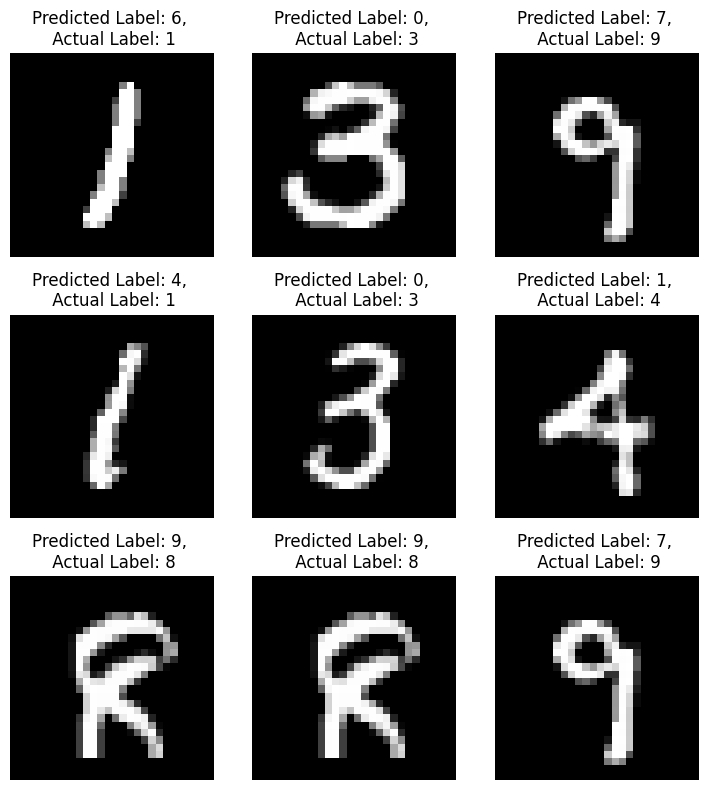

In [108]:
# Initialize the neural network
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()

Unremarkable changes from baseline when adding a final dropout or a secondary sequential dropout steps with p = 0.25 or 0.5, respectively, regularization step. Worst performance from 3 iterations so far, at 96.23%.

### adding dropout steps in between layers


Epoch 1, Batch 100, Loss: 1.4889772975444793
Epoch 1, Batch 200, Loss: 0.6093780812621117
Epoch 1, Batch 300, Loss: 0.4968287256360054
Epoch 1, Batch 400, Loss: 0.43166769444942477
Epoch 1, Batch 500, Loss: 0.3805474239587784
Epoch 1, Batch 600, Loss: 0.3711250051110983
Epoch 1, Batch 700, Loss: 0.3380368100106716
Epoch 1, Batch 800, Loss: 0.3247874619066715
Epoch 1, Batch 900, Loss: 0.3001961778104305
Epoch 2, Batch 100, Loss: 0.2942735227197409
Epoch 2, Batch 200, Loss: 0.29191919811069966
Epoch 2, Batch 300, Loss: 0.24523897878825665
Epoch 2, Batch 400, Loss: 0.27164661899209025
Epoch 2, Batch 500, Loss: 0.27332792840898035
Epoch 2, Batch 600, Loss: 0.25967355228960515
Epoch 2, Batch 700, Loss: 0.24722318403422833
Epoch 2, Batch 800, Loss: 0.23193871721625328
Epoch 2, Batch 900, Loss: 0.22195833019912242
Epoch 3, Batch 100, Loss: 0.23135899215936662
Epoch 3, Batch 200, Loss: 0.22567969858646392
Epoch 3, Batch 300, Loss: 0.22872789267450572
Epoch 3, Batch 400, Loss: 0.213663534335792

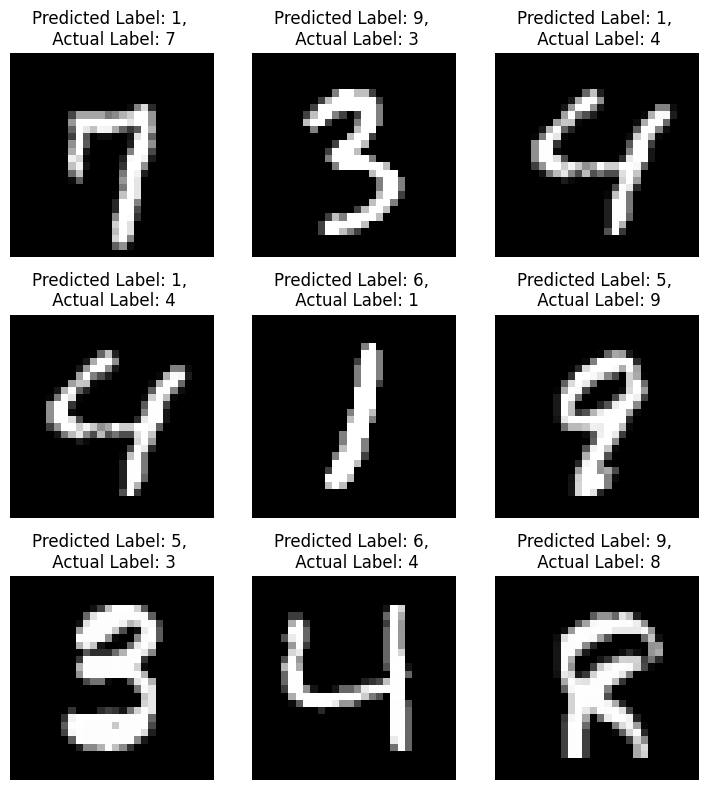

In [109]:
"""
Place all methods into a single MLP class

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
- add a dropout layer with p=0.5 as a technqiue for regularization
"""

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(128, 128) #additional fully-connected layers with different input and output neuron counts
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.
        self.dropout = nn.Dropout(0.25) ## ADD DROPOUT FOR REGULARIZATION
        self.dropout2 = nn.Dropout2d(0.5)
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = self.dropout(x)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
    def train_model(self, train_loader, optimizer, criterion, num_epochs=5):
        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        for epoch in range(num_epochs):
            self.train()  # Set the model to training mode
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)  # Call forward method directly on self
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:  # print every 100 mini-batches
                    print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                    running_loss = 0.0

        print('Finished Training')
        
    def evaluate_model(self):
                # Evaluate the model and store predictions
        self.eval()
        predictions = []
        self.correct = 0
        self.total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())  # Store predictions
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()

        print(f'\n Accuracy on test set: { round(self.correct / self.total * 100,5)}%')
        
        #plot 9 test dataset samples
        figure = plt.figure(figsize=(8, 8))
        cols, rows = 3, 3
        for i in range(1, cols * rows + 1):
            #sample_idx = random.randint(1,31)
            sample_idx = torch.randint(len(images), size=(1,)).item()
            img, label = images[sample_idx], labels[sample_idx]
            figure.add_subplot(rows, cols, i)
            #plt.title(labels_map[label])
            plt.title(f'Predicted Label: {predictions[sample_idx]}, \n Actual Label: {label.item()}')
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
            plt.tight_layout()
        plt.show()
        
# Initialize the neural network
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()

Slight increase in performance on test set at 95.695% when dropout steps are included in between layers.

### Increasing number of nodes in the layer to 256


#### Code

Epoch 1, Batch 100, Loss: 1.3477428671717644
Epoch 1, Batch 200, Loss: 0.5066513276100159
Epoch 1, Batch 300, Loss: 0.43939553439617157
Epoch 1, Batch 400, Loss: 0.4007837890088558
Epoch 1, Batch 500, Loss: 0.3515601671487093
Epoch 1, Batch 600, Loss: 0.3049049672484398
Epoch 1, Batch 700, Loss: 0.31686541236937044
Epoch 1, Batch 800, Loss: 0.2896700157225132
Epoch 1, Batch 900, Loss: 0.28475514411926267
Epoch 2, Batch 100, Loss: 0.25342573087662457
Epoch 2, Batch 200, Loss: 0.23886393044143917
Epoch 2, Batch 300, Loss: 0.23487542010843754
Epoch 2, Batch 400, Loss: 0.2359029793739319
Epoch 2, Batch 500, Loss: 0.22788717750459908
Epoch 2, Batch 600, Loss: 0.2397583607584238
Epoch 2, Batch 700, Loss: 0.20123848404735326
Epoch 2, Batch 800, Loss: 0.21532803256064653
Epoch 2, Batch 900, Loss: 0.20224853090941905
Epoch 3, Batch 100, Loss: 0.18466430582106114
Epoch 3, Batch 200, Loss: 0.18604251634329558
Epoch 3, Batch 300, Loss: 0.1886278061941266
Epoch 3, Batch 400, Loss: 0.183188055716455

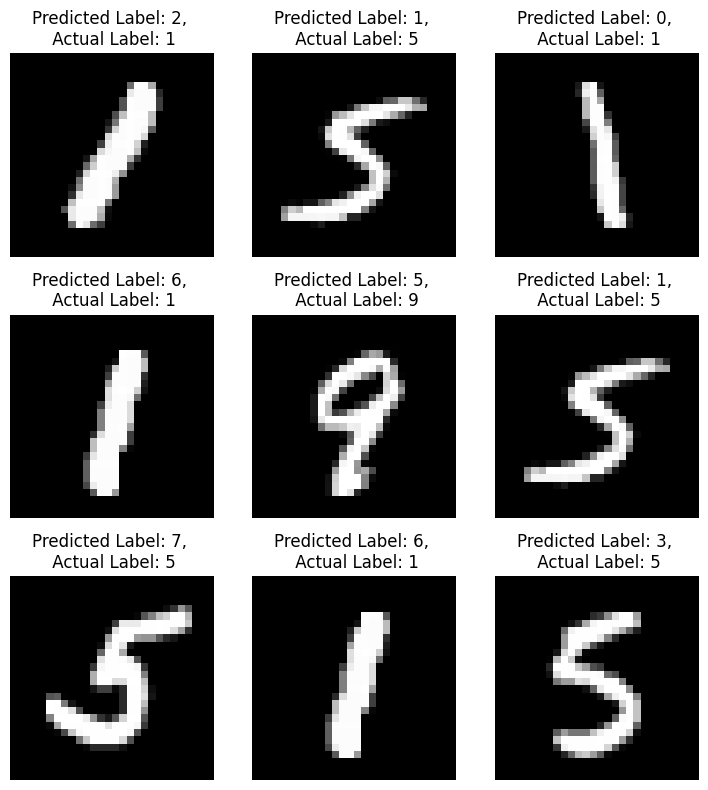

In [110]:
#### Increasing number of nodes in the layer to 256

"""
Place all methods into a single MLP class

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
- add a dropout layer with p=0.5 as a technqiue for regularization
"""

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(256, 128) #additional fully-connected layers with different input and output neuron counts
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.
        self.dropout = nn.Dropout(0.25) ## ADD DROPOUT FOR REGULARIZATION
        self.dropout2 = nn.Dropout2d(0.5)
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = self.dropout(x)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
    def train_model(self, train_loader, optimizer, criterion, num_epochs=5):
        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        for epoch in range(num_epochs):
            self.train()  # Set the model to training mode
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)  # Call forward method directly on self
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:  # print every 100 mini-batches
                    print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                    running_loss = 0.0

        print('Finished Training')
        
    def evaluate_model(self):
                # Evaluate the model and store predictions
        self.eval()
        predictions = []
        self.correct = 0
        self.total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())  # Store predictions
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()

        print(f'\n Accuracy on test set: { round(self.correct / self.total * 100,5)}%')
        
        #plot 9 test dataset samples
        figure = plt.figure(figsize=(8, 8))
        cols, rows = 3, 3
        for i in range(1, cols * rows + 1):
            #sample_idx = random.randint(1,31)
            sample_idx = torch.randint(len(images), size=(1,)).item()
            img, label = images[sample_idx], labels[sample_idx]
            figure.add_subplot(rows, cols, i)
            #plt.title(labels_map[label])
            plt.title(f'Predicted Label: {predictions[sample_idx]}, \n Actual Label: {label.item()}')
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
            plt.tight_layout()
        plt.show()
        
# Initialize the neural network
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()

By expading the first hidden layer to 256 nodes, a performance rating of 96.32% was produced. 

Epoch 1, Batch 100, Loss: 1.2256600221991538
Epoch 1, Batch 200, Loss: 0.5078087240457535
Epoch 1, Batch 300, Loss: 0.4279424612224102
Epoch 1, Batch 400, Loss: 0.3709503787755966
Epoch 1, Batch 500, Loss: 0.341357501745224
Epoch 1, Batch 600, Loss: 0.3275132834911346
Epoch 1, Batch 700, Loss: 0.2971778665482998
Epoch 1, Batch 800, Loss: 0.25999514043331146
Epoch 1, Batch 900, Loss: 0.26141339518129825
Epoch 2, Batch 100, Loss: 0.24600403405725957
Epoch 2, Batch 200, Loss: 0.2385947870463133
Epoch 2, Batch 300, Loss: 0.2319057308137417
Epoch 2, Batch 400, Loss: 0.22654546059668065
Epoch 2, Batch 500, Loss: 0.2172136928141117
Epoch 2, Batch 600, Loss: 0.20376721393316985
Epoch 2, Batch 700, Loss: 0.20588082168251276
Epoch 2, Batch 800, Loss: 0.2121656412631273
Epoch 2, Batch 900, Loss: 0.18705328471958638
Epoch 3, Batch 100, Loss: 0.19052364204078912
Epoch 3, Batch 200, Loss: 0.17987995717674493
Epoch 3, Batch 300, Loss: 0.15074505287222564
Epoch 3, Batch 400, Loss: 0.17273370806127786


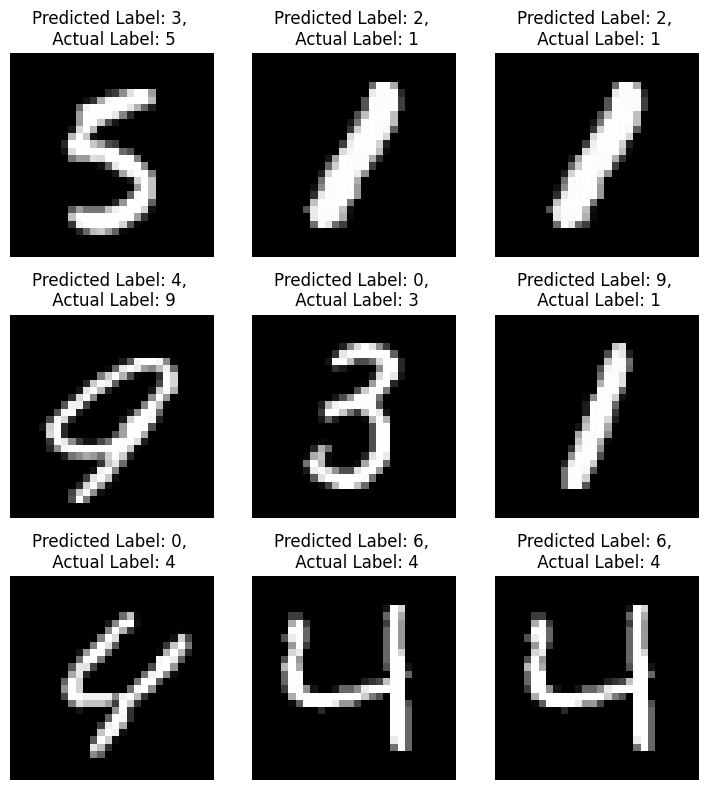

In [111]:
#### Increasing number of nodes in the layer to 256

"""
Place all methods into a single MLP class

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
- add a dropout layer with p=0.5 as a technqiue for regularization
"""

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(256, 256) #additional fully-connected layers with different input and output neuron counts
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.
        self.dropout = nn.Dropout(0.25) ## ADD DROPOUT FOR REGULARIZATION
        self.dropout2 = nn.Dropout2d(0.5)
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = self.dropout(x)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
    def train_model(self, train_loader, optimizer, criterion, num_epochs=5):
        # Define the loss function and optimizer
        criterion = nn.CrossEntropyLoss()
        optimizer = optim.Adam(model.parameters(), lr=0.001)
        for epoch in range(num_epochs):
            self.train()  # Set the model to training mode
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)  # Call forward method directly on self
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:  # print every 100 mini-batches
                    print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                    running_loss = 0.0

        print('Finished Training')
        
    def evaluate_model(self):
                # Evaluate the model and store predictions
        self.eval()
        predictions = []
        self.correct = 0
        self.total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())  # Store predictions
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()

        print(f'\n Accuracy on test set: { round(self.correct / self.total * 100,5)}%')
        
        #plot 9 test dataset samples
        figure = plt.figure(figsize=(8, 8))
        cols, rows = 3, 3
        for i in range(1, cols * rows + 1):
            #sample_idx = random.randint(1,31)
            sample_idx = torch.randint(len(images), size=(1,)).item()
            img, label = images[sample_idx], labels[sample_idx]
            figure.add_subplot(rows, cols, i)
            #plt.title(labels_map[label])
            plt.title(f'Predicted Label: {predictions[sample_idx]}, \n Actual Label: {label.item()}')
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
            plt.tight_layout()
        plt.show()
        
# Initialize the neural network
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()

96.72333% has been the greatest performance thus far with 256 hidden nodes, uniformly distributed amongst hidden layers.

### Changing optimizer from Adam to SGD

Epoch 1, Batch 100, Loss: 4.125339894294739
Epoch 1, Batch 200, Loss: 3.956392002105713
Epoch 1, Batch 300, Loss: 3.6832315731048584
Epoch 1, Batch 400, Loss: 3.191497573852539
Epoch 1, Batch 500, Loss: 2.7066907858848572
Epoch 1, Batch 600, Loss: 2.4518297123908996
Epoch 1, Batch 700, Loss: 2.34644015789032
Epoch 1, Batch 800, Loss: 2.2928713536262513
Epoch 1, Batch 900, Loss: 2.2572996115684507
Epoch 2, Batch 100, Loss: 2.202371129989624
Epoch 2, Batch 200, Loss: 2.165719542503357
Epoch 2, Batch 300, Loss: 2.139731814861298
Epoch 2, Batch 400, Loss: 2.0933611381053923
Epoch 2, Batch 500, Loss: 2.056277327537537
Epoch 2, Batch 600, Loss: 2.0231426906585694
Epoch 2, Batch 700, Loss: 1.9601311564445496
Epoch 2, Batch 800, Loss: 1.9156517112255096
Epoch 2, Batch 900, Loss: 1.864577476978302
Epoch 3, Batch 100, Loss: 1.7820267295837402
Epoch 3, Batch 200, Loss: 1.7296667790412903
Epoch 3, Batch 300, Loss: 1.6828950786590575
Epoch 3, Batch 400, Loss: 1.6183415400981902
Epoch 3, Batch 500, 

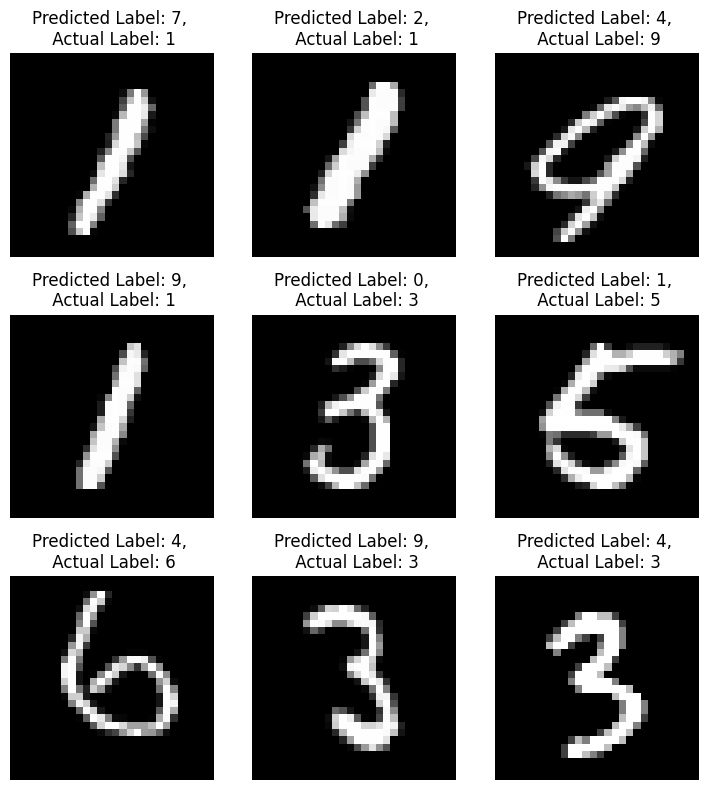

In [112]:
#### Code

#### Increasing number of nodes in the layer to 256

"""
Place all methods into a single MLP class

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
- add a dropout layer with p=0.5 as a technqiue for regularization
"""

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 256) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(256, 256) #additional fully-connected layers with different input and output neuron counts
        self.fc3 = nn.Linear(256, 64)
        self.fc4 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.
        self.dropout = nn.Dropout(0.25) ## ADD DROPOUT FOR REGULARIZATION
        self.dropout2 = nn.Dropout2d(0.5)
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = self.dropout(x)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
    def train_model(self, train_loader, optimizer, criterion, num_epochs=5):
        # Define the loss function and optimizer
        for epoch in range(num_epochs):
            self.train()  # Set the model to training mode
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)  # Call forward method directly on self
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:  # print every 100 mini-batches
                    print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                    running_loss = 0.0

        print('Finished Training')
        
    def evaluate_model(self):
                # Evaluate the model and store predictions
        self.eval()
        predictions = []
        self.correct = 0
        self.total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())  # Store predictions
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()

        print(f'\n Accuracy on test set: { round(self.correct / self.total * 100,5)}%')
        
        #plot 9 test dataset samples
        figure = plt.figure(figsize=(8, 8))
        cols, rows = 3, 3
        for i in range(1, cols * rows + 1):
            #sample_idx = random.randint(1,31)
            sample_idx = torch.randint(len(images), size=(1,)).item()
            img, label = images[sample_idx], labels[sample_idx]
            figure.add_subplot(rows, cols, i)
            #plt.title(labels_map[label])
            plt.title(f'Predicted Label: {predictions[sample_idx]}, \n Actual Label: {label.item()}')
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
            plt.tight_layout()
        plt.show()
        
# Initialize the neural network
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0, dampening=0, weight_decay=0, nesterov=False)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()

Modifying optimizer from Adam to SGD leads to a higher initial loss metric and slower degradation of loss per epoch. Additionally, there is a significant drop in performance in accuracy at 82.545%.

### Changing criterion from CrossEntropyLoss to Binary Cross-Entropy:

Epoch 1, Batch 100, Loss: 4.095081610679626
Epoch 1, Batch 200, Loss: 3.9056629443168642
Epoch 1, Batch 300, Loss: 3.5583682322502135
Epoch 1, Batch 400, Loss: 3.0595577144622803
Epoch 1, Batch 500, Loss: 2.672969927787781
Epoch 1, Batch 600, Loss: 2.480034670829773
Epoch 1, Batch 700, Loss: 2.406130146980286
Epoch 1, Batch 800, Loss: 2.3704853892326354
Epoch 1, Batch 900, Loss: 2.3055992317199707
Epoch 2, Batch 100, Loss: 2.2675992608070374
Epoch 2, Batch 200, Loss: 2.2330518412590026
Epoch 2, Batch 300, Loss: 2.208804335594177
Epoch 2, Batch 400, Loss: 2.162653486728668
Epoch 2, Batch 500, Loss: 2.127912086248398
Epoch 2, Batch 600, Loss: 2.096877882480621
Epoch 2, Batch 700, Loss: 2.0515007531642913
Epoch 2, Batch 800, Loss: 2.012264951467514
Epoch 2, Batch 900, Loss: 1.9739925837516785
Epoch 3, Batch 100, Loss: 1.9106356799602509
Epoch 3, Batch 200, Loss: 1.8700604605674744
Epoch 3, Batch 300, Loss: 1.8194362926483154
Epoch 3, Batch 400, Loss: 1.7674734604358673
Epoch 3, Batch 500,

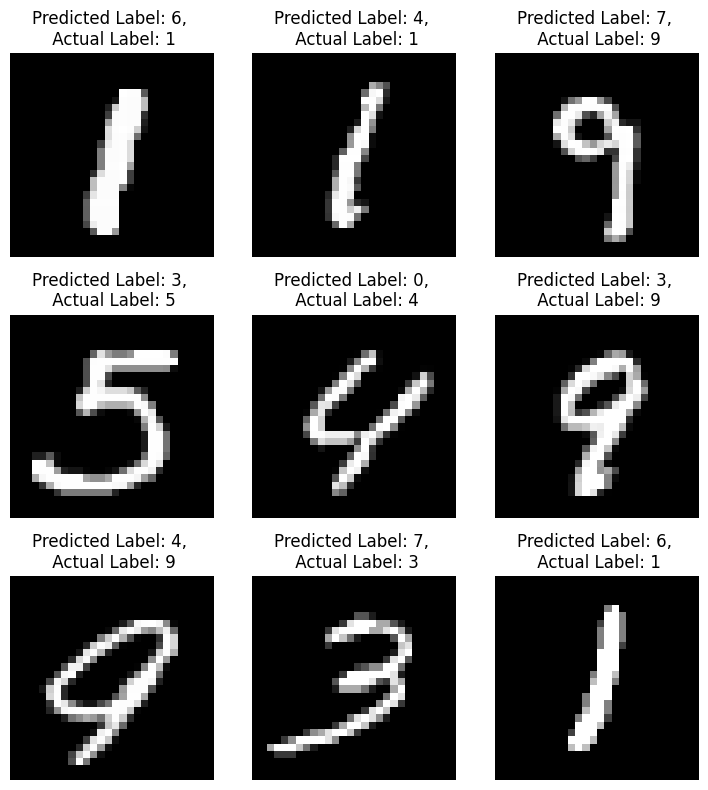

RuntimeError: Found dtype Long but expected Float

In [113]:
#### Code

#### Increasing number of nodes in the layer to 256

"""
Place all methods into a single MLP class

https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html
- add a dropout layer with p=0.5 as a technqiue for regularization
"""

class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128) #fully-connected layer named fc1 with 28*28 input neurons
        self.fc2 = nn.Linear(128, 128) #additional fully-connected layers with different input and output neuron counts
        self.fc3 = nn.Linear(128, 64)
        self.fc4 = nn.Linear(64, 10) #applied without activation, returning the final output of the network as a 1D tensor with 10 elements,representing probabilities of belonging to 10 different classes.
        self.dropout = nn.Dropout(0.25) ## ADD DROPOUT FOR REGULARIZATION
        self.dropout2 = nn.Dropout2d(0.5)
        
        
    def forward(self, x):
        x = x.view(-1, 28 * 28) #reshapes the input x into a 2D tensor with one row and 28*28 columns, flatten it into a vector
        x = torch.relu(self.fc1(x)) #applies the ReLU activation function to the output of the first fully-connected layer (fc1)
        x = self.dropout(x)
        x = torch.relu(self.fc2(x)) #applying ReLU activation
        x = self.dropout(x)
        x = self.fc3(x)
        return x
    
    def train_model(self, train_loader, optimizer, criterion, num_epochs=5):
        # Define the loss function and optimizer
        for epoch in range(num_epochs):
            self.train()  # Set the model to training mode
            running_loss = 0.0
            for i, data in enumerate(train_loader, 0):
                inputs, labels = data
                optimizer.zero_grad()
                outputs = self(inputs)  # Call forward method directly on self
                loss = criterion(outputs, labels)
                loss.backward()
                optimizer.step()
                running_loss += loss.item()
                if i % 100 == 99:  # print every 100 mini-batches
                    print(f'Epoch {epoch + 1}, Batch {i + 1}, Loss: {running_loss / 100}')
                    running_loss = 0.0

        print('Finished Training')
        
    def evaluate_model(self):
                # Evaluate the model and store predictions
        self.eval()
        predictions = []
        self.correct = 0
        self.total = 0
        with torch.no_grad():
            for data in test_loader:
                images, labels = data
                outputs = model(images)
                _, predicted = torch.max(outputs.data, 1)
                predictions.extend(predicted.numpy())  # Store predictions
                self.total += labels.size(0)
                self.correct += (predicted == labels).sum().item()

        print(f'\n Accuracy on test set: { round(self.correct / self.total * 100,5)}%')
        
        #plot 9 test dataset samples
        figure = plt.figure(figsize=(8, 8))
        cols, rows = 3, 3
        for i in range(1, cols * rows + 1):
            #sample_idx = random.randint(1,31)
            sample_idx = torch.randint(len(images), size=(1,)).item()
            img, label = images[sample_idx], labels[sample_idx]
            figure.add_subplot(rows, cols, i)
            #plt.title(labels_map[label])
            plt.title(f'Predicted Label: {predictions[sample_idx]}, \n Actual Label: {label.item()}')
            plt.axis("off")
            plt.imshow(img.squeeze(), cmap="gray")
            plt.tight_layout()
        plt.show()
        
# Initialize the neural network
model = MLP()
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0, dampening=0, weight_decay=0, nesterov=False)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()


model = MLP()
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0, dampening=0, weight_decay=0, nesterov=False)
model.train_model(train_loader=train_loader,optimizer=optimizer,criterion=criterion,num_epochs=5)
model.evaluate_model()

As expected with non-continuous targets and class labels, MSE loss resulted in the lowest performance out of all experimentation steps with a performance measure of 77.87833%

## Summary

In summary, there were 6 experimentation steps to expand the capacity of the model to learn or adjust its adaptation to optimize or minimize loss function during the training process.

The best overall performing model was the baseline model, achieving a test accuracy score of 96.7%.

In ranking:

    1. Baseline (96.7%)
    2. adding an additional dense layer of 128 nodes (96.51%)
    3. Increasing number of nodes in the layer to 256 (96.32%)
    4. add a dropout layer(s) (96.23%)
    5. adding dropout steps in between layers (95.69%)
    6. Changing optimizer from Adam to SGD (82.545%)
    7. Changing criterion from CrossEntropyLoss to Binary Cross-Entropy (77.87833)

Expanding the number of layers and nodes within may be expected to increase complexity and ability to generalize at the expense of computational resources. However, it is shown through few experimental iterations that this may not be the case entirely. The model may perform better on training relative to testing, indicative of overfitting. Dropout as a method for regularization to reduce the number of connections may eliminate critical established connections for inference, leading to subpar performances. Contrast to overfitting can be the case of underfitting and not capturing enough patterns in the data. Adam as the optimzer step may be the ideal baseline method as shown as evident when modified to SGD. Finally, given that the problem is a 10-class classification, switching to a loss metric designed for binary classificiation is expected to yield lowered performances.